In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 导入数据

In [11]:
df = pd.read_csv("D:/Data/kaggle/LoanStats_2016Q3.csv", skiprows=1, low_memory=False)      #看源数据就可知第一行为链接，舍去

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%,82.67,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%,880.02,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.49%,329.72,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,13.49%,203.59,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()        #看一下df大致情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99122 entries, 0 to 99121
Columns: 122 entries, id to sec_app_mths_since_last_major_derog
dtypes: float64(97), object(25)
memory usage: 92.3+ MB


# 数据清洗

In [14]:
df.ix[:4, :7]

C:\Users\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.49%
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,13.49%


In [15]:
df.drop('id', axis=1, inplace=True)         #id缺失太多，无效删除，按列删除，直接在原df上起作用
df.drop('member_id', 1, inplace=True)

In [16]:
df.int_rate = pd.Series(df.int_rate).str.replace('%','').astype(float)        #把int_rate列百分号去掉

In [17]:
df.ix[:4, :7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,15000.0,15000.0,15000.0,36 months,13.99,512.60,C
1,2600.0,2600.0,2600.0,36 months,8.99,82.67,B
2,32200.0,32200.0,32200.0,60 months,21.49,880.02,D
3,10000.0,10000.0,10000.0,36 months,11.49,329.72,B
4,6000.0,6000.0,6000.0,36 months,13.49,203.59,C


loan_amnt和funded_amnt似乎很多是相等的，查看一下

In [18]:
print((df.loan_amnt != df.funded_amnt).value_counts())           #只有2行记录是不一样的

False    99120
True         2
dtype: int64


In [20]:
df.query('loan_amnt != funded_amnt').head(5)                 #发现两行记录完全是空的

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
99120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.dropna(axis=0, how='all', inplace=True)        #删除全部为空的行

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 120 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(97), object(23)
memory usage: 91.5+ MB


In [23]:
df.dropna(axis=1, how='all', inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 108 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(85), object(23)
memory usage: 82.4+ MB


In [25]:
df.ix[:5, 8:15]              #之前检查过前7列，现在检查8-15列

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,Fiscal Director,2 years,RENT,55000.0,Not Verified,Sep-2016,Current
1,Loaner Coordinator,3 years,RENT,35000.0,Source Verified,Sep-2016,Fully Paid
2,warehouse/supervisor,10+ years,MORTGAGE,65000.0,Not Verified,Sep-2016,Fully Paid
3,Teacher,10+ years,OWN,55900.0,Not Verified,Sep-2016,Current
4,SERVICE MGR,5 years,RENT,33000.0,Not Verified,Sep-2016,Current
5,General Manager,10+ years,MORTGAGE,109000.0,Source Verified,Sep-2016,Current


In [26]:
df.emp_title.value_counts()

Teacher                                  1931
Manager                                  1701
Owner                                     990
Supervisor                                785
Driver                                    756
Registered Nurse                          752
RN                                        731
Sales                                     664
Project Manager                           526
General Manager                           483
Office Manager                            466
Director                                  415
owner                                     384
Engineer                                  382
President                                 351
manager                                   314
Operations Manager                        314
Vice President                            288
teacher                                   284
Nurse                                     284
Attorney                                  275
Accountant                        

In [31]:
df.emp_title.unique().shape                 #职业种类太多了，没办法处理

(37421,)

In [32]:
df.drop(['emp_title'], 1, inplace=True)

In [33]:
df.ix[:5, 8:15]

,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan
0,2 years,RENT,55000.0,Not Verified,Sep-2016,Current,n
1,3 years,RENT,35000.0,Source Verified,Sep-2016,Fully Paid,n
2,10+ years,MORTGAGE,65000.0,Not Verified,Sep-2016,Fully Paid,n
3,10+ years,OWN,55900.0,Not Verified,Sep-2016,Current,n
4,5 years,RENT,33000.0,Not Verified,Sep-2016,Current,n
5,10+ years,MORTGAGE,109000.0,Source Verified,Sep-2016,Current,n


In [34]:
df.emp_length.value_counts()

10+ years    34219
2 years       9066
3 years       7925
< 1 year      7104
1 year        6991
5 years       6170
4 years       6022
n/a           5922
6 years       4406
8 years       4168
9 years       3922
7 years       3205
Name: emp_length, dtype: int64

In [35]:
df.replace('n/a', np.nan, inplace=True)
df.emp_length.fillna(value=0, inplace=True)            #把5922个缺失值，填充成0

In [36]:
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype('int')         #把工作年限，转化为数字

In [37]:
df.emp_length.value_counts()

10    34219
1     14095
2      9066
3      7925
5      6170
4      6022
0      5922
6      4406
8      4168
9      3922
7      3205
Name: emp_length, dtype: int64

In [38]:
df.verification_status.value_counts()

Source Verified    40781
Verified           31356
Not Verified       26983
Name: verification_status, dtype: int64

### 目标：Loan Statuses 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 107 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(85), int32(1), object(21)
memory usage: 83.8+ MB


In [40]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=107)

In [43]:
pd.unique(df['loan_status'].values.ravel())

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [49]:
df.loan_status.head(5)

0       Current
1    Fully Paid
2    Fully Paid
3       Current
4       Current
Name: loan_status, dtype: object

In [50]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,15000.0,15000.0,15000.0,36 months,13.99,512.60,C,C3,2,RENT,...,0.0,5.0,100.0,33.3,0.0,0.0,147587.0,140492.0,30200.0,108587.0
1,2600.0,2600.0,2600.0,36 months,8.99,82.67,B,B1,3,RENT,...,0.0,0.0,100.0,0.0,0.0,0.0,73227.0,19497.0,50200.0,20527.0
2,32200.0,32200.0,32200.0,60 months,21.49,880.02,D,D5,10,MORTGAGE,...,0.0,2.0,100.0,40.0,1.0,0.0,199969.0,24934.0,13900.0,15886.0
3,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,10,OWN,...,0.0,6.0,100.0,66.7,0.0,0.0,68831.0,38085.0,13500.0,36431.0
4,6000.0,6000.0,6000.0,36 months,13.49,203.59,C,C2,5,RENT,...,0.0,1.0,100.0,100.0,0.0,0.0,17500.0,15393.0,4800.0,12700.0


In [51]:
for col in df.select_dtypes(include=['object']).columns:                    #把object类的列找出来，然后看一下值unique有多少种，后续需要one-hot编码
    print("{} : {} unique instances".format(col, len(df[col].unique())))

term : 2 unique instances
grade : 7 unique instances
sub_grade : 35 unique instances
home_ownership : 4 unique instances
verification_status : 3 unique instances
issue_d : 3 unique instances
loan_status : 7 unique instances
pymnt_plan : 2 unique instances
desc : 6 unique instances
purpose : 13 unique instances
title : 13 unique instances
zip_code : 873 unique instances
addr_state : 50 unique instances
earliest_cr_line : 614 unique instances
revol_util : 1087 unique instances
initial_list_status : 2 unique instances
last_pymnt_d : 13 unique instances
next_pymnt_d : 4 unique instances
last_credit_pull_d : 14 unique instances
application_type : 3 unique instances
verification_status_joint : 2 unique instances


In [52]:
df.select_dtypes(include=['O']).describe().T.assign(missing_pct = df.apply(lambda x: (len(x) - x.count())/float(len(x))))  #缺失比例

,count,unique,top,freq,missing_pct
term,99120,2,36 months,73898,0.000000
grade,99120,7,C,32846,0.000000
sub_grade,99120,35,B5,8322,0.000000
home_ownership,99120,4,MORTGAGE,46761,0.000000
verification_status,99120,3,Source Verified,40781,0.000000
issue_d,99120,3,Aug-2016,36280,0.000000
loan_status,99120,7,Current,79445,0.000000
pymnt_plan,99120,2,n,99074,0.000000
desc,6,5,,2,0.999939
purpose,99120,13,debt_consolidation,57682,0.000000


top：频数最高者；freq：频数

In [53]:
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)        #把%去掉

In [54]:
df.drop('desc', 1, inplace=True)
df.drop('verification_status_joint', 1, inplace=True)           #缺失太多的列去掉

In [55]:
df.drop('zip_code',1,inplace=True)
df.drop('addr_state',1,inplace=True)
df.drop('earliest_cr_line',1,inplace=True)
df.drop('revol_util',1,inplace=True)
df.drop('purpose',1,inplace=True)
df.drop('title',1,inplace=True)
df.drop('term',1,inplace=True)
df.drop('issue_d',1,inplace=True)
# df.drop('',1,inplace=True)
# 贷后相关的字段
df.drop(['out_prncp','out_prncp_inv','total_pymnt',
         'total_pymnt_inv','total_rec_prncp', 'grade', 'sub_grade'] ,1, inplace=True)
df.drop(['total_rec_int','total_rec_late_fee',
         'recoveries','collection_recovery_fee',
         'collection_recovery_fee' ],1, inplace=True)
df.drop(['last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'],1, inplace=True)
df.drop(['policy_code'],1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Data columns (total 81 columns):
loan_amnt                         99120 non-null float64
funded_amnt                       99120 non-null float64
funded_amnt_inv                   99120 non-null float64
int_rate                          99120 non-null float64
installment                       99120 non-null float64
emp_length                        99120 non-null int32
home_ownership                    99120 non-null object
annual_inc                        99120 non-null float64
verification_status               99120 non-null object
loan_status                       99120 non-null object
pymnt_plan                        99120 non-null object
dti                               99120 non-null float64
delinq_2yrs                       99120 non-null float64
inq_last_6mths                    99120 non-null float64
mths_since_last_delinq            53366 non-null float64
mths_since_last_record            19792 no

In [57]:
df.ix[:5, :10]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status
0,15000.0,15000.0,15000.0,13.99,512.60,2,RENT,55000.0,Not Verified,Current
1,2600.0,2600.0,2600.0,8.99,82.67,3,RENT,35000.0,Source Verified,Fully Paid
2,32200.0,32200.0,32200.0,21.49,880.02,10,MORTGAGE,65000.0,Not Verified,Fully Paid
3,10000.0,10000.0,10000.0,11.49,329.72,10,OWN,55900.0,Not Verified,Current
4,6000.0,6000.0,6000.0,13.49,203.59,5,RENT,33000.0,Not Verified,Current
5,30000.0,30000.0,30000.0,13.99,697.90,10,MORTGAGE,109000.0,Source Verified,Current


In [58]:
df.ix[:5, 10:21]

,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status
0,n,23.78,1.0,0.0,7.0,NaN,22.0,0.0,21345.0,43.0,f
1,n,6.73,0.0,0.0,NaN,NaN,14.0,0.0,720.0,24.0,w
2,n,11.71,0.0,1.0,NaN,87.0,17.0,1.0,11987.0,34.0,w
3,n,26.21,0.0,2.0,NaN,NaN,15.0,0.0,17209.0,62.0,w
4,n,19.05,0.0,0.0,NaN,NaN,3.0,0.0,4576.0,11.0,f
5,n,16.24,0.0,0.0,NaN,NaN,17.0,0.0,11337.0,39.0,w


In [59]:
print(df.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_o

In [60]:
print(df.head(1).values)

[[15000.0 15000.0 15000.0 13.99 512.6 2 'RENT' 55000.0 'Not Verified'
  'Current' 'n' 23.78 1.0 0.0 7.0 nan 22.0 0.0 21345.0 43.0 'f' 0.0 nan
  'INDIVIDUAL' nan nan 0.0 0.0 140492.0 3.0 10.0 2.0 3.0 11.0 119147.0
  101.0 3.0 4.0 14612.0 83.0 39000.0 1.0 6.0 0.0 7.0 6386.0 9645.0 73.1 0.0
  0.0 157.0 248.0 4.0 4.0 0.0 4.0 7.0 22.0 7.0 0.0 5.0 9.0 6.0 7.0 25.0
  11.0 18.0 9.0 22.0 0.0 0.0 0.0 5.0 100.0 33.3 0.0 0.0 147587.0 140492.0
  30200.0 108587.0]]


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Data columns (total 81 columns):
loan_amnt                         99120 non-null float64
funded_amnt                       99120 non-null float64
funded_amnt_inv                   99120 non-null float64
int_rate                          99120 non-null float64
installment                       99120 non-null float64
emp_length                        99120 non-null int32
home_ownership                    99120 non-null object
annual_inc                        99120 non-null float64
verification_status               99120 non-null object
loan_status                       99120 non-null object
pymnt_plan                        99120 non-null object
dti                               99120 non-null float64
delinq_2yrs                       99120 non-null float64
inq_last_6mths                    99120 non-null float64
mths_since_last_delinq            53366 non-null float64
mths_since_last_record            19792 no

In [62]:
df.select_dtypes(include=['float']).describe().T.assign(missing_pct = df.apply(lambda x: (len(x) - x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt_inv,99120.0,14166.087823,8883.301328,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
int_rate,99120.0,13.723641,4.873910,5.32,10.49,12.79,15.59,30.99,0.000000
installment,99120.0,432.718654,272.678596,30.12,235.24,361.38,569.83,1535.71,0.000000
annual_inc,99120.0,78488.850081,72694.186060,0.00,48000.00,65448.00,94000.00,8400000.00,0.000000
dti,99120.0,18.348651,64.057603,0.00,11.91,17.60,23.90,9999.00,0.000000
delinq_2yrs,99120.0,0.381901,0.988996,0.00,0.00,0.00,0.00,21.00,0.000000
inq_last_6mths,99120.0,0.570521,0.863796,0.00,0.00,0.00,1.00,5.00,0.000000
mths_since_last_delinq,53366.0,33.229172,21.820407,0.00,15.00,30.00,48.00,142.00,0.461602


In [63]:
df.drop('annual_inc_joint', 1, inplace=True)
df.drop('dti_joint', 1, inplace=True)

In [64]:
df.select_dtypes(include=['int']).describe().T.assign(missing_pct=df.apply(lambda x: (len(x) - x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
emp_length,99120.0,5.757092,3.770359,0.0,2.0,6.0,10.0,10.0,0.0


### 目标：Loan_Statuses 

In [65]:
df['loan_status'].value_counts()

Current               79445
Fully Paid            13066
Charged Off            2502
Late (31-120 days)     2245
In Grace Period        1407
Late (16-30 days)       454
Default                   1
Name: loan_status, dtype: int64

In [66]:
df.loan_status.replace('Fully Paid', int(1),inplace=True)
df.loan_status.replace('Current', int(1),inplace=True)
df.loan_status.replace('Late (16-30 days)', int(0),inplace=True)
df.loan_status.replace('Late (31-120 days)', int(0),inplace=True)
df.loan_status.replace('Charged Off', np.nan,inplace=True)
df.loan_status.replace('In Grace Period', np.nan,inplace=True)
df.loan_status.replace('Default', np.nan,inplace=True)
# df.loan_status.astype('int')
df.loan_status.value_counts()                                     #转化成0/1，不借/借

1.0    92511
0.0     2699
Name: loan_status, dtype: int64

In [67]:
df.dropna(subset=['loan_status'], inplace=True)

### 高度关联的数据 

In [68]:
cor = df.corr()
cor.loc[:, :] = np.tril(cor, k=-1)               #下三角矩阵
cor = cor.stack()
cor[(cor > 0.55)|(cor < -0.55)]

funded_amnt                     loan_amnt                      1.000000
funded_amnt_inv                 loan_amnt                      0.999994
                                funded_amnt                    0.999994
installment                     loan_amnt                      0.953380
                                funded_amnt                    0.953380
                                funded_amnt_inv                0.953293
mths_since_last_delinq          delinq_2yrs                   -0.551275
total_acc                       open_acc                       0.722950
mths_since_last_major_derog     mths_since_last_delinq         0.685642
open_il_24m                     open_il_12m                    0.760219
total_bal_il                    open_il_6m                     0.566551
open_rv_12m                     open_acc_6m                    0.623975
open_rv_24m                     open_rv_12m                    0.774954
max_bal_bc                      revol_bal                      0

In [69]:
df.drop(['funded_amnt','funded_amnt_inv', 'installment'], axis=1, inplace=True)

In [74]:
df.shape

(95210, 76)

In [76]:
df.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,15000.0,13.99,2,RENT,55000.0,Not Verified,1.0,n,23.78,1.0,...,0.0,5.0,100.0,33.3,0.0,0.0,147587.0,140492.0,30200.0,108587.0
1,2600.0,8.99,3,RENT,35000.0,Source Verified,1.0,n,6.73,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,73227.0,19497.0,50200.0,20527.0
2,32200.0,21.49,10,MORTGAGE,65000.0,Not Verified,1.0,n,11.71,0.0,...,0.0,2.0,100.0,40.0,1.0,0.0,199969.0,24934.0,13900.0,15886.0
3,10000.0,11.49,10,OWN,55900.0,Not Verified,1.0,n,26.21,0.0,...,0.0,6.0,100.0,66.7,0.0,0.0,68831.0,38085.0,13500.0,36431.0
4,6000.0,13.49,5,RENT,33000.0,Not Verified,1.0,n,19.05,0.0,...,0.0,1.0,100.0,100.0,0.0,0.0,17500.0,15393.0,4800.0,12700.0


In [77]:
df.to_csv('D:/Data/kaggle/LoanStates_76.csv', index=None)

# 模型

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder

In [111]:
df = pd.read_csv("D:/Data/kaggle/LoanStates_76.csv")

In [112]:
df.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,15000.0,13.99,2,RENT,55000.0,Not Verified,1.0,n,23.78,1.0,...,0.0,5.0,100.0,33.3,0.0,0.0,147587.0,140492.0,30200.0,108587.0
1,2600.0,8.99,3,RENT,35000.0,Source Verified,1.0,n,6.73,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,73227.0,19497.0,50200.0,20527.0
2,32200.0,21.49,10,MORTGAGE,65000.0,Not Verified,1.0,n,11.71,0.0,...,0.0,2.0,100.0,40.0,1.0,0.0,199969.0,24934.0,13900.0,15886.0
3,10000.0,11.49,10,OWN,55900.0,Not Verified,1.0,n,26.21,0.0,...,0.0,6.0,100.0,66.7,0.0,0.0,68831.0,38085.0,13500.0,36431.0
4,6000.0,13.49,5,RENT,33000.0,Not Verified,1.0,n,19.05,0.0,...,0.0,1.0,100.0,100.0,0.0,0.0,17500.0,15393.0,4800.0,12700.0


In [113]:
Y = df.loan_status

In [114]:
print(Y.shape)
print(sum(Y))                #92511人得到贷款，2699人得不到贷款，比例34:1

(95210,)
92511.0


In [115]:
df.drop('loan_status', axis=1, inplace=True)

In [117]:
df.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,15000.0,13.99,2,RENT,55000.0,Not Verified,n,23.78,1.0,0.0,...,0.0,5.0,100.0,33.3,0.0,0.0,147587.0,140492.0,30200.0,108587.0
1,2600.0,8.99,3,RENT,35000.0,Source Verified,n,6.73,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,73227.0,19497.0,50200.0,20527.0
2,32200.0,21.49,10,MORTGAGE,65000.0,Not Verified,n,11.71,0.0,1.0,...,0.0,2.0,100.0,40.0,1.0,0.0,199969.0,24934.0,13900.0,15886.0
3,10000.0,11.49,10,OWN,55900.0,Not Verified,n,26.21,0.0,2.0,...,0.0,6.0,100.0,66.7,0.0,0.0,68831.0,38085.0,13500.0,36431.0
4,6000.0,13.49,5,RENT,33000.0,Not Verified,n,19.05,0.0,0.0,...,0.0,1.0,100.0,100.0,0.0,0.0,17500.0,15393.0,4800.0,12700.0


In [118]:
X = df

In [119]:
X.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,15000.0,13.99,2,RENT,55000.0,Not Verified,n,23.78,1.0,0.0,...,0.0,5.0,100.0,33.3,0.0,0.0,147587.0,140492.0,30200.0,108587.0
1,2600.0,8.99,3,RENT,35000.0,Source Verified,n,6.73,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,73227.0,19497.0,50200.0,20527.0
2,32200.0,21.49,10,MORTGAGE,65000.0,Not Verified,n,11.71,0.0,1.0,...,0.0,2.0,100.0,40.0,1.0,0.0,199969.0,24934.0,13900.0,15886.0
3,10000.0,11.49,10,OWN,55900.0,Not Verified,n,26.21,0.0,2.0,...,0.0,6.0,100.0,66.7,0.0,0.0,68831.0,38085.0,13500.0,36431.0
4,6000.0,13.49,5,RENT,33000.0,Not Verified,n,19.05,0.0,0.0,...,0.0,1.0,100.0,100.0,0.0,0.0,17500.0,15393.0,4800.0,12700.0


In [120]:
X.shape

(95210, 75)

In [121]:
X = pd.get_dummies(X)

In [122]:
X.shape

(95210, 84)

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95210 entries, 0 to 95209
Data columns (total 84 columns):
loan_amnt                              95210 non-null float64
int_rate                               95210 non-null float64
emp_length                             95210 non-null int64
annual_inc                             95210 non-null float64
dti                                    95210 non-null float64
delinq_2yrs                            95210 non-null float64
inq_last_6mths                         95210 non-null float64
mths_since_last_delinq                 51229 non-null float64
mths_since_last_record                 18903 non-null float64
open_acc                               95210 non-null float64
pub_rec                                95210 non-null float64
revol_bal                              95210 non-null float64
total_acc                              95210 non-null float64
collections_12_mths_ex_med             95210 non-null float64
mths_since_last_major_der

In [124]:
X.fillna(0.0, inplace=True)
X.fillna(0, inplace=True)

## Train & Test Data 

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [126]:
print(x_train.shape, y_train.shape)

(66647, 84) (66647,)


In [128]:
print(x_test.shape, y_test.shape)

(28563, 84) (28563,)


In [129]:
print(y_train.value_counts())            #训练集 发放贷款的比例  33:1

1.0    64712
0.0     1935
Name: loan_status, dtype: int64


In [130]:
print(y_test.value_counts())            #测试集 发放贷款的比例   37:1

1.0    27799
0.0      764
Name: loan_status, dtype: int64


## GBRT 

In [131]:
param_grid = {
    'learning_rate':[0.1],
    'max_depth':[2],
    'min_samples_split':[50, 100],
    'n_estimators':[100, 200]
}

In [132]:
est = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid, n_jobs=4, refit=True)

In [133]:
est.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.1], 'max_depth': [2], 'min_samples_split': [50, 100], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [134]:
best_params = est.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 100}


In [135]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50, n_estimators=300, learning_rate=0.1, max_depth=2, random_state=0, loss='ls').fit(x_train, y_train)

Wall time: 44.9 s


In [136]:
est.score(x_test, y_test)

0.026585506661889635

In [137]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=100,
                                         learning_rate=0.1,max_depth=2, random_state=0,loss='ls').\
fit(x_train, y_train)

Wall time: 15.8 s


In [138]:
est.score(x_test,y_test)

0.029210266192750467

In [139]:
def compute_ks(data):
    sorted_list = data.sort_values(['predict'], ascending=[True])
    total_bad = sorted_list['label'].sum(axis = None, skipna=None, level=None, numeric_only=None)/3
    total_good = sorted_list.shape(0) - total_bad
    
    max_ks = 0.0
    good_count = 0.0
    bad_count = 0.0 
    for index, row in sorted_list.iterrows():
        if row['label'] == 3:
            bad_count += 1.0
        else:
            good_count += 1.0
        
        val = bad_count/total_bad - good_count/total_good
        max_ks = max(max_ks, val)
    return max_ks

In [142]:
feature_importance = est.feature_importances_
feature_importance = 100.0*(feature_importance/feature_importance.max())

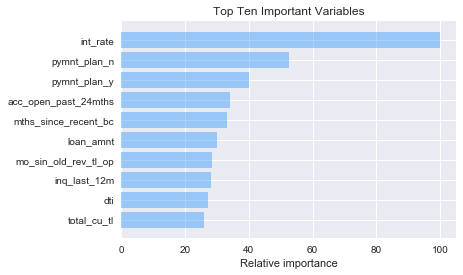

In [143]:
indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices], color='dodgerblue', alpha=0.4)
plt.yticks(np.arange(10+0.5), np.array(X.columns)[indices])
_= plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

## Xgb RFR ETR

In [144]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

In [145]:
clf2 = xgb.XGBClassifier(n_estimators=50, max_depth=1, learning_rate=0.01, subsample=0.8, colsample_bytree=0.3,
                        scale_pos_weight=3.0, silent = True, nthread=-1, seed=0, missing=None, objective='binary:logistic', 
                        reg_alpha=1, reg_lambda=1, gamma=0, min_child_weight=1, max_delta_step=0, base_score=0.5)

In [146]:
clf2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=3.0, seed=0,
       silent=True, subsample=0.8)

In [147]:
print(clf2.score(x_test, y_test))

0.973637222981


In [148]:
print(clf2.feature_importances_)

[ 0.          0.09677419  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.03225806
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.03225806  0.61290324  0.22580644  0.          0.          0.          0.
  0.        ]


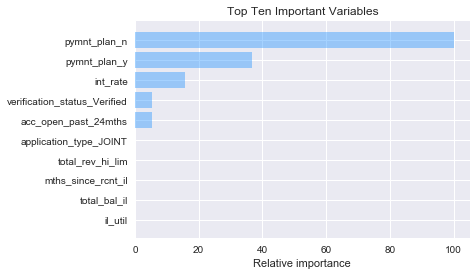

In [149]:
feature_importance = clf2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

In [150]:
clf3 = RandomForestRegressor(n_jobs=-1, max_depth=10, random_state=0)

In [151]:
clf3.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [152]:
print(clf3.score(x_test, y_test))

0.0148713087517


In [153]:
print(clf3.feature_importances_)

[ 0.02588781  0.10778862  0.00734994  0.02090219  0.02231172  0.00778016
  0.00556834  0.01097013  0.00734689  0.0017027   0.00622544  0.01140843
  0.00530896  0.00031185  0.01135318  0.          0.01488991  0.01840559
  0.00585621  0.00652523  0.0066759   0.00727607  0.00955013  0.01004672
  0.01785864  0.00855197  0.00985739  0.01477432  0.02184904  0.01816184
  0.00878854  0.02078236  0.01310288  0.00844302  0.01596395  0.01825196
  0.01817367  0.00297759  0.00084823  0.02808718  0.02917066  0.00897034
  0.01139324  0.01532409  0.01467681  0.0032855   0.01066291  0.00581661
  0.00955357  0.00417743  0.01333577  0.00489264  0.0128039   0.01340195
  0.01286394  0.01619219  0.00395603  0.00508973  0.          0.00234757
  0.00378329  0.00502684  0.01732834  0.01178674  0.00030035  0.01189509
  0.00942532  0.00841645  0.01571355  0.00288054  0.          0.0011667
  0.00106548  0.00488734  0.          0.00200132  0.00062765  0.04130873
  0.10076558  0.00022293  0.00165858  0.00308408  0.

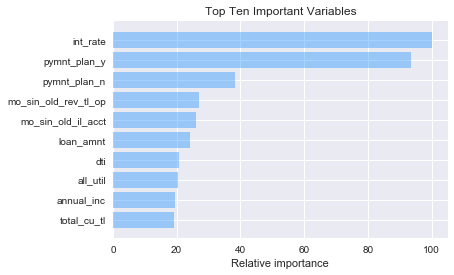

In [154]:
feature_importance = clf3.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

In [155]:
clf4 = ExtraTreesRegressor(n_jobs=-1, max_depth=10, random_state=0)

In [156]:
clf4.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
          verbose=0, warm_start=False)

In [157]:
print(clf4.score(x_test, y_test))

0.020808034579


In [158]:
print(clf4.feature_importances_)

[ 0.00950112  0.17496689  0.00476969  0.00538677  0.00898343  0.01604885
  0.0139889   0.00605683  0.0042762   0.00358536  0.0144985   0.00915189
  0.00643305  0.00637134  0.0050764   0.00218012  0.00925068  0.00363339
  0.00988441  0.00645297  0.00662444  0.00934969  0.00739012  0.00635592
  0.00633908  0.00923972  0.01263829  0.01190224  0.00914159  0.00402144
  0.00917841  0.01456563  0.01161155  0.01097394  0.00506868  0.00772159
  0.00560163  0.01132941  0.00172528  0.0085601   0.01282485  0.00970629
  0.00956066  0.00731205  0.02087289  0.00430205  0.0062769   0.00765693
  0.00922104  0.00296456  0.00563208  0.00459181  0.0133819   0.00548208
  0.00450864  0.0132415   0.00677772  0.00509891  0.00108962  0.00578448
  0.00934323  0.00715127  0.01078137  0.00855071  0.00695096  0.01488993
  0.00317962  0.00485367  0.00476553  0.00509674  0.          0.00733654
  0.00097223  0.00380448  0.00534715  0.00356893  0.0128526   0.11944538
  0.11758343  0.00195945  0.00225379  0.00243429  0

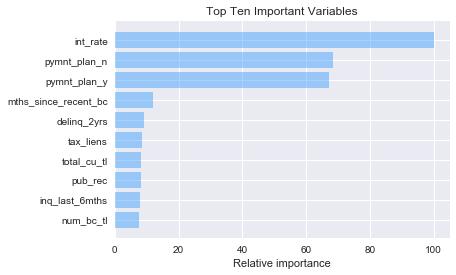

In [159]:
feature_importance = clf4.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

作业：
1. feature-engineering
2. stacking
3. 画出ROC曲线和KS曲线对比